<a href="https://colab.research.google.com/github/VEHEMENT2003/Machinelearnig/blob/main/PORTFOLIO_OPTIMIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Portfolio Optimization using Monte Carlo Simulation and Mathematical Algorithm in Python
!pip install quandl

In [ ]:
import pandas as pd
import numpy as np
import quandl
start = pd.to_datetime('2013-01-01')
end = pd.to_datetime('2018-01-01')
# Grabbing a bunch of banking stocks for our portfolio
jpm = quandl.get('WIKI/JPM.11',start_date=start,end_date=end)
citi = quandl.get('WIKI/C.11',start_date=start,end_date=end)
bofa = quandl.get('WIKI/BAC.11',start_date=start,end_date=end)
wfc = quandl.get('WIKI/WFC.11',start_date=start,end_date=end)
jpm.to_csv('JPM_CLOSE')
citi.to_csv('CITI_CLOSE')
bofa.to_csv('BOFA_CLOSE')
wfc.to_csv('WFC_CLOSE')

In [ ]:
for stock_df in (jpm, citi, bofa, wfc):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']
jpm.head()


,Adj. Close,Normed Return
Date,,
2013-01-02,39.388479,1.000000
2013-01-03,39.309103,0.997985
2013-01-04,40.005853,1.015674
2013-01-07,40.049952,1.016794
2013-01-08,40.129328,1.018809


In [ ]:
for stock_df,allo in zip([jpm,citi,bofa,wfc],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo
jpm.head()


,Adj. Close,Normed Return,Allocation
Date,,,
2013-01-02,39.388479,1.000000,0.300000
2013-01-03,39.309103,0.997985,0.299395
2013-01-04,40.005853,1.015674,0.304702
2013-01-07,40.049952,1.016794,0.305038
2013-01-08,40.129328,1.018809,0.305643


In [ ]:
for stock_df in [jpm,citi,bofa,wfc]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000
jpm.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2013-01-02,39.388479,1.000000,0.300000,300000.000000
2013-01-03,39.309103,0.997985,0.299395,299395.432154
2013-01-04,40.005853,1.015674,0.304702,304702.194357
2013-01-07,40.049952,1.016794,0.305038,305038.065383
2013-01-08,40.129328,1.018809,0.305643,305642.633229


In [ ]:
portfolio_val = pd.concat([jpm['Position Values'],citi['Position Values'],bofa['Position Values'],wfc['Position Values']],axis=1)
portfolio_val.columns = ['JPM Pos','CITI Pos','BOFA Pos','WFC Pos']
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

Text(0.5, 1.0, 'Total Portfolio Value')

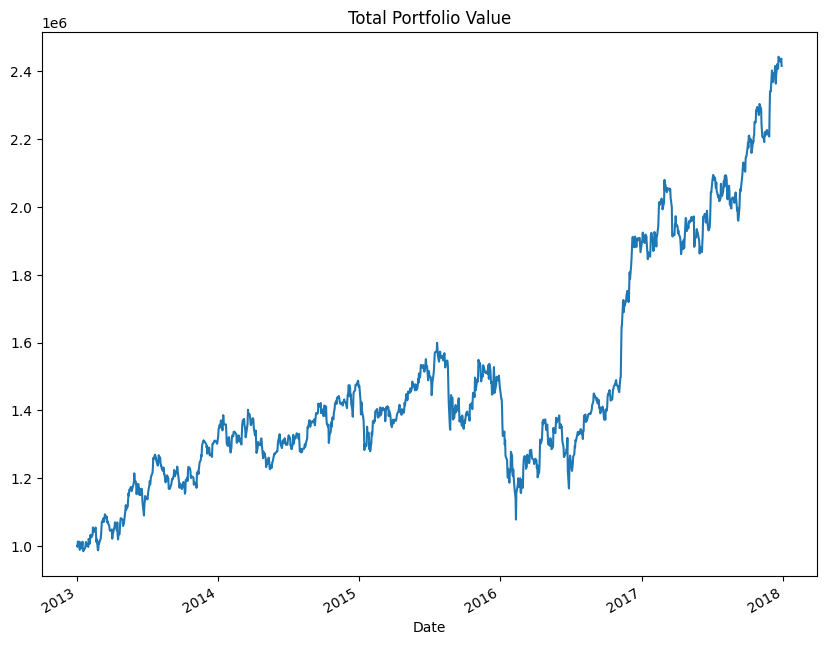

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<Axes: xlabel='Date'>

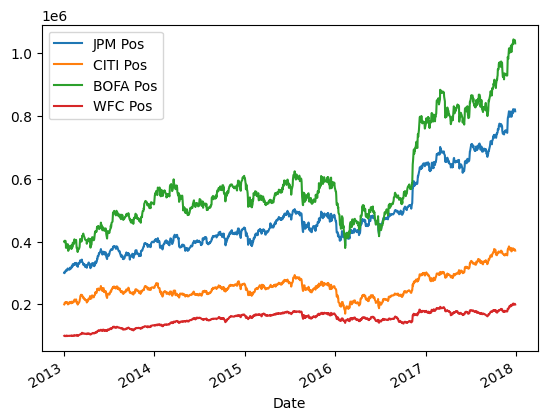

In [ ]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [ ]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val

,JPM Pos,CITI Pos,BOFA Pos,WFC Pos,Total Pos,Daily Return
Date,,,,,,
2013-01-02,300000.000000,200000.000000,4.000000e+05,100000.000000,1.000000e+06,NaN
2013-01-03,299395.432154,200678.787879,3.976725e+05,99172.610556,9.969193e+05,-0.003081
2013-01-04,304702.194357,205720.242424,4.026600e+05,99686.162625,1.012769e+06,0.015898
2013-01-07,305038.065383,205915.151515,4.019950e+05,99201.141227,1.012149e+06,-0.000611
2013-01-08,305642.633229,205866.666667,3.983375e+05,99029.957204,1.008877e+06,-0.003233
...,...,...,...,...,...,...
2017-12-22,818386.509220,376544.466823,1.043243e+06,202516.670710,2.440691e+06,-0.001082
2017-12-26,815111.439895,373002.983561,1.039752e+06,201134.753542,2.429001e+06,-0.004790
2017-12-27,816634.727953,373551.664066,1.038006e+06,200542.503327,2.428735e+06,-0.000110


In [ ]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our cumulative return is {} percent!'.format(cum_ret))

Our cumulative return is 141.5954585426872 percent!


In [ ]:
portfolio_val['Daily Return'].std()

0.013327393687233922

In [ ]:
portfolio_val['Daily Return'].std()

0.013327393687233922

In [ ]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.05933301006046501

In [ ]:
ASR = (252**0.5)*SR
ASR

0.9418823349413031

In [ ]:
# Download and get Daily Returns
jpm = pd.read_csv('JPM_CLOSE',index_col='Date',parse_dates=True)
citi = pd.read_csv('CITI_CLOSE',index_col='Date',parse_dates=True)
bofa = pd.read_csv('BOFA_CLOSE',index_col='Date',parse_dates=True)
wfc = pd.read_csv('WFC_CLOSE',index_col='Date',parse_dates=True)
stocks = pd.concat([jpm,citi,bofa,wfc],axis=1)
stocks.columns = ['jpm','citi','bofa','wfc']
stocks.head()

,jpm,citi,bofa,wfc
Date,,,,
2013-01-02,39.388479,40.096194,11.456583,30.392560
2013-01-03,39.309103,40.232278,11.389920,30.141095
2013-01-04,40.005853,41.242994,11.532770,30.297176
2013-01-07,40.049952,41.282069,11.513723,30.149766
2013-01-08,40.129328,41.272349,11.408966,30.097739


In [ ]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,jpm,citi,bofa,wfc
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.002017,0.003388,-0.005836,-0.008308
2013-01-04,0.017570,0.024812,0.012464,0.005165
2013-01-07,0.001102,0.000947,-0.001653,-0.004877
2013-01-08,0.001980,-0.000235,-0.009140,-0.001727


In [ ]:
#calculate the log return mean of each stock
log_ret.mean() * 252

jpm     0.200236
citi    0.123957
bofa    0.189752
wfc     0.138580
dtype: float64

In [ ]:
# Compute pairwise covariance of columns
log_ret.cov()*252

,jpm,citi,bofa,wfc
jpm,0.040823,0.040931,0.042180,0.029326
citi,0.040931,0.056871,0.050899,0.033152
bofa,0.042180,0.050899,0.063467,0.035182
wfc,0.029326,0.033152,0.035182,0.034296
